In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import datetime
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

c:\users\berkan\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\berkan\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\berkan\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv("2021-dublin-city-cycle-counts.csv")
df['day_of_week'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%A'))
#df['day_of_month'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%d'))
df['day_of_week_num'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%w'))
df['time_of_day'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%H'))
df['month'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%m'))
df = df.fillna(-1)

# df_monday = df[df['day_of_week'] == 'Monday'].fillna(0)
# df_tuesday = df[df['day_of_week'] == 'Tuesday'].fillna(0)
# df_wednesday = df[df['day_of_week'] == 'Wednesday'].fillna(0)
# df_thursday = df[df['day_of_week'] == 'Thursday'].fillna(0)
# df_friday = df[df['day_of_week'] == 'Friday'].fillna(0)
# df_saturday = df[df['day_of_week'] == 'Saturday'].fillna(0)
# df_sunday = df[df['day_of_week'] == 'Sunday'].fillna(0)

In [3]:
def preprocessing(df):
    data = np.array(df)
    
    park_names = np.array(df.columns.values[1:-4])
    label_parks = data[:,1:-4].astype(np.int64)
    data_parks = data[:,-3:].astype(np.int64)
    
    len_parks = label_parks.shape[1]
    all_labels_parks = list()
    all_park_names = list()
    
    # Indices for days
#     monday_indices = np.where(data_parks[:,0] == 0)[0]
#     tuesday_indices = np.where(data_parks[:,0] == 1)[0]
#     wednesday_indices = np.where(data_parks[:,0] == 2)[0]
#     thursday_indices = np.where(data_parks[:,0] == 3)[0]
#     friday_indices = np.where(data_parks[:,0] == 4)[0]
#     saturday_indices = np.where(data_parks[:,0] == 5)[0]
#     sunday_indices = np.where(data_parks[:,0] == 6)[0]
    
    # Park Selection
    for i in range(len_parks):
        park = label_parks[:,i]
        indices_not_nan = np.where(park != -1)[0]
        indices_nan = np.where(park == -1)[0]
        if (len(indices_nan) < int( len(park) * 0.5)):

            for indice_nan in indices_nan:
                day = data_parks[indice_nan,0]
                time = data_parks[indice_nan,1]
                indices_mean = np.where((data_parks[:,0] == day) & (data_parks[:,1] == time))[0]
                park[indice_nan] = np.mean(park[indices_mean])

            all_labels_parks.append(park)
            all_park_names.append(park_names[i])
                
        
    return data_parks, np.array(all_labels_parks).reshape(label_parks.shape[0],-1), np.array(all_park_names)

In [4]:
# Data_parks columns = [day, hour, month]
# All_labels_parks columns = [Park1, Park2,.. etc]
data_parks, all_labels_parks, all_park_names = preprocessing(df)

In [58]:
print(data_parks.shape)
print(all_labels_parks[:,40])
print(all_park_names[0])

(7560, 3)
[ 49   1  98 ...   5 497   7]
Bachelors walk/Bachelors way


In [6]:
# sundays_all = np.array(df)
# park_names = sundays_all[0]
# labels_sunday = sundays_all[:,1:-3]
# data_sunday = sundays_all[:,-3:].astype(np.int64)

# labels_sunday_1 = labels_sunday[:,3].astype(np.int64)
# labels_sunday_1 = labels_sunday_1.reshape(-1,1)

# result = np.where((data_sunday[:,0] == 0) & (data_sunday[:,1] == 1))[0]
# print(list(df.columns.values[1:-4]))
# print(data_sunday.shape)
# print(labels_sunday_1[0])

In [7]:
# indices_minus_1 = np.where(labels_sunday[:,0] != -1)[0]
# print(data_sunday[:,0].shape)
# print(labels_sunday[:,0].shape)

In [8]:
# label_park = all_labels_parks[:,0].reshape(-1,1)
# print(label_park)

In [9]:
# scaler = MinMaxScaler()
# scaler.fit(label_park)
# train_sc = scaler.transform(label_park)
# #test = scaler.transform(y_test)
# print(train_sc.shape)

In [10]:
# figureNo = 0
# plt.rc('font', size=18)
# plt.figure(figureNo, figsize=(6,6))
# plt.title('The spread of original data', pad=20)
# plt.xlabel('The first feature (x_1)', labelpad=20)
# plt.ylabel('The second feature (x_2)', labelpad=20)
# x_lim = np.arange(0,len(train_sc))
# plt.plot(x_lim, train_sc)


# plt.show()


In [11]:
# train_size = int(len(train_sc)/10 * 8)
# y_train = train_sc[0:train_size]
# y_test = train_sc[train_size:]
# print(y_train.shape)
# print(y_test.shape)

In [12]:
# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

In [13]:
def sequential_data(X, seq_size):
    Xs = list()
    ys = list()
    for i in range(len(X) - seq_size):
        Xs.append(X[i:(i + seq_size)])
        ys.append(X[i + seq_size])
    return np.array(Xs), np.array(ys)

In [14]:
# seq_size = 48
# X_train, Y_train = sequential_data(y_train, seq_size)
# X_test, Y_test = sequential_data(y_test, seq_size)
# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)

In [44]:
# create and fit the LSTM network
# model = keras.Sequential()
# model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences = True))
# model.add(LSTM(32))
# model.add(Dense(units=X_train.shape[2]))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.summary()

In [24]:
r2_scores_train = list()
r2_scores_test = list()
seq_size = 48
model_history = list()
train_rmse = list()
test_rmse = list()

test_data = list()
pred_data = list()
for i in range(all_labels_parks.shape[1]):
    print("Park Number {a}".format(a = i+1))
    label_park = all_labels_parks[:,i].reshape(-1,1)
    
    scaler = MinMaxScaler()
    scaler.fit(label_park)
    train_sc = scaler.transform(label_park)
    
    train_size = int(len(train_sc)/10 * 9)
    y_train = train_sc[0:train_size]
    y_test = train_sc[train_size:]
    
    X_train, Y_train = sequential_data(y_train, seq_size)
    X_test, Y_test = sequential_data(y_test, seq_size)

    model = keras.Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units=X_train.shape[2]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    #model.summary()
    
    history = model.fit(X_train, Y_train, epochs=20, batch_size=32, 
                        validation_split=0.1,verbose=1,shuffle=False)
    
    model_history.append(history)
    # make predictions
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)
    #invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train)
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test)

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
    train_rmse.append(trainScore)
    testScore = math.sqrt(mean_squared_error(Y_test, testPredict))
    test_rmse.append(testScore)
    
    r2_scores_train.append(r2_score(testY, testPredict))
    r2_scores_test.append(r2_score(trainY, trainPredict))
    
    #Storing for plot
    test_data.append(testY)
    pred_data.append(testPredict)

Park Number 1
Epoch 1/20
190/190 [==============================] - 11s 40ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 2/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0028 - val_loss: 8.8789e-04
Epoch 3/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0027 - val_loss: 8.7528e-04
Epoch 4/20
190/190 [==============================] - 7s 34ms/step - loss: 0.0025 - val_loss: 9.0413e-04
Epoch 5/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 6/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0019 - val_loss: 8.8737e-04
Epoch 7/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0017 - val_loss: 9.3297e-04
Epoch 8/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0016 - val_loss: 8.4453e-04
Epoch 9/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0015 - val_loss: 8.6172e-04
Epoch 10/20
190/190 [===========================

190/190 [==============================] - 7s 36ms/step - loss: 0.0010 - val_loss: 8.3748e-04
Epoch 19/20
190/190 [==============================] - 7s 35ms/step - loss: 9.9899e-04 - val_loss: 8.4665e-04
Epoch 20/20
190/190 [==============================] - 7s 35ms/step - loss: 9.8803e-04 - val_loss: 8.5998e-04
Park Number 5
Epoch 1/20
190/190 [==============================] - 11s 43ms/step - loss: 0.0032 - val_loss: 9.7822e-04
Epoch 2/20
190/190 [==============================] - 7s 34ms/step - loss: 0.0025 - val_loss: 8.9343e-04
Epoch 3/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0019 - val_loss: 6.1263e-04
Epoch 4/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0013 - val_loss: 5.9977e-04
Epoch 5/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0011 - val_loss: 5.2785e-04
Epoch 6/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0010 - val_loss: 5.2182e-04
Epoch 7/20
190/190 [=====================

190/190 [==============================] - 6s 34ms/step - loss: 8.8969e-04 - val_loss: 8.9068e-04
Epoch 14/20
190/190 [==============================] - 7s 34ms/step - loss: 8.8967e-04 - val_loss: 9.0054e-04
Epoch 15/20
190/190 [==============================] - 6s 34ms/step - loss: 8.8399e-04 - val_loss: 9.3030e-04
Epoch 16/20
190/190 [==============================] - 7s 34ms/step - loss: 8.9255e-04 - val_loss: 9.2624e-04
Epoch 17/20
190/190 [==============================] - 7s 35ms/step - loss: 8.9836e-04 - val_loss: 8.5929e-04
Epoch 18/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 19/20
190/190 [==============================] - 7s 34ms/step - loss: 9.7918e-04 - val_loss: 8.7749e-04
Epoch 20/20
190/190 [==============================] - 7s 34ms/step - loss: 9.1199e-04 - val_loss: 8.4473e-04
Park Number 9
Epoch 1/20
190/190 [==============================] - 11s 40ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 2/20
190/190 [====

Epoch 11/20
190/190 [==============================] - 7s 34ms/step - loss: 9.9653e-04 - val_loss: 5.9457e-04
Epoch 12/20
190/190 [==============================] - 7s 35ms/step - loss: 9.7987e-04 - val_loss: 6.0495e-04
Epoch 13/20
190/190 [==============================] - 7s 35ms/step - loss: 9.7058e-04 - val_loss: 5.5725e-04
Epoch 14/20
190/190 [==============================] - 7s 35ms/step - loss: 9.6495e-04 - val_loss: 6.7335e-04
Epoch 15/20
190/190 [==============================] - 7s 34ms/step - loss: 9.8228e-04 - val_loss: 5.4035e-04
Epoch 16/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0010 - val_loss: 7.7159e-04
Epoch 17/20
190/190 [==============================] - 6s 33ms/step - loss: 0.0010 - val_loss: 5.4400e-04
Epoch 18/20
190/190 [==============================] - 6s 31ms/step - loss: 9.2365e-04 - val_loss: 5.7938e-04
Epoch 19/20
190/190 [==============================] - 6s 31ms/step - loss: 8.9974e-04 - val_loss: 5.4979e-04
Epoch 20/20
190/19

190/190 [==============================] - 6s 30ms/step - loss: 0.0012 - val_loss: 6.5230e-04A - ETA: 0
Epoch 7/20
190/190 [==============================] - 6s 30ms/step - loss: 0.0011 - val_loss: 6.1787e-04
Epoch 8/20
190/190 [==============================] - 6s 32ms/step - loss: 0.0010 - val_loss: 6.1390e-04
Epoch 9/20
190/190 [==============================] - 6s 34ms/step - loss: 9.7438e-04 - val_loss: 6.0025e-04
Epoch 10/20
190/190 [==============================] - 7s 35ms/step - loss: 9.3529e-04 - val_loss: 5.9802e-04
Epoch 11/20
190/190 [==============================] - 6s 33ms/step - loss: 9.3342e-04 - val_loss: 6.0016e-04
Epoch 12/20
190/190 [==============================] - 6s 32ms/step - loss: 9.1521e-04 - val_loss: 6.0242e-04
Epoch 13/20
190/190 [==============================] - 6s 32ms/step - loss: 9.0366e-04 - val_loss: 6.0703e-04
Epoch 14/20
190/190 [==============================] - 6s 31ms/step - loss: 8.9440e-04 - val_loss: 6.1201e-04ETA:
Epoch 15/20
190/190 [==

190/190 [==============================] - 9s 29ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 2/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 3/20
190/190 [==============================] - 6s 32ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/20
190/190 [==============================] - 6s 34ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 5/20
190/190 [==============================] - 6s 32ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/20
190/190 [==============================] - 6s 33ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/20
190/190 [==============================] - 5s 27ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/20
190/190 [==============================] - 7s 35ms/step - loss: 0.0011 - val_loss: 9.6742e

190/190 [==============================] - 6s 32ms/step - loss: 9.9704e-04 - val_loss: 8.2729e-04
Epoch 20/20
190/190 [==============================] - 6s 31ms/step - loss: 9.6572e-04 - val_loss: 8.0450e-04
Park Number 24
Epoch 1/20
190/190 [==============================] - 9s 35ms/step - loss: 0.0022 - val_loss: 8.0993e-04
Epoch 2/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0019 - val_loss: 6.2083e-04
Epoch 3/20
190/190 [==============================] - 6s 33ms/step - loss: 0.0018 - val_loss: 6.5019e-04
Epoch 4/20
190/190 [==============================] - 6s 32ms/step - loss: 0.0017 - val_loss: 6.1559e-04
Epoch 5/20
190/190 [==============================] - 6s 32ms/step - loss: 0.0017 - val_loss: 6.3435e-04
Epoch 6/20
190/190 [==============================] - 6s 32ms/step - loss: 0.0017 - val_loss: 6.3136e-04
Epoch 7/20
190/190 [==============================] - 6s 30ms/step - loss: 0.0017 - val_loss: 6.5033e-04
Epoch 8/20
190/190 [======================

190/190 [==============================] - 6s 31ms/step - loss: 0.0013 - val_loss: 9.3208e-04
Epoch 17/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0015 - val_loss: 7.6712e-04
Epoch 18/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0012 - val_loss: 7.3219e-04
Epoch 19/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0012 - val_loss: 7.5247e-04
Epoch 20/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0012 - val_loss: 7.7246e-04
Park Number 28
Epoch 1/20
190/190 [==============================] - 10s 39ms/step - loss: 0.0034 - val_loss: 9.4300e-04
Epoch 2/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0029 - val_loss: 8.5952e-04
Epoch 3/20
190/190 [==============================] - 6s 33ms/step - loss: 0.0026 - val_loss: 6.8453e-04
Epoch 4/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0018 - val_loss: 5.7722e-04
Epoch 5/20
190/190 [==========================

190/190 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 4.5600e-04
Epoch 12/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 4.5411e-04
Epoch 13/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 4.5211e-04
Epoch 14/20
190/190 [==============================] - 6s 32ms/step - loss: 0.0011 - val_loss: 4.5003e-04
Epoch 15/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 4.4802e-04
Epoch 16/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 4.4619e-04
Epoch 17/20
190/190 [==============================] - 6s 32ms/step - loss: 0.0011 - val_loss: 4.4465e-04
Epoch 18/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 4.4345e-04
Epoch 19/20
190/190 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 4.4260e-04
Epoch 20/20
190/190 [==============================] - 6s 

190/190 [==============================] - 4s 19ms/step - loss: 0.0013 - val_loss: 9.8910e-04
Epoch 9/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 7.5711e-04
Epoch 10/20
190/190 [==============================] - 4s 19ms/step - loss: 9.4571e-04 - val_loss: 7.9254e-04
Epoch 11/20
190/190 [==============================] - 4s 19ms/step - loss: 9.0693e-04 - val_loss: 7.9004e-04
Epoch 12/20
190/190 [==============================] - 4s 19ms/step - loss: 8.7533e-04 - val_loss: 7.9712e-04
Epoch 13/20
190/190 [==============================] - 4s 19ms/step - loss: 8.5981e-04 - val_loss: 7.8948e-04
Epoch 14/20
190/190 [==============================] - 4s 19ms/step - loss: 8.4553e-04 - val_loss: 7.8747e-04
Epoch 15/20
190/190 [==============================] - 4s 19ms/step - loss: 8.3107e-04 - val_loss: 7.8463e-04
Epoch 16/20
190/190 [==============================] - 4s 19ms/step - loss: 8.1414e-04 - val_loss: 7.8559e-04
Epoch 17/20
190/190 [==========

190/190 [==============================] - 4s 19ms/step - loss: 0.0013 - val_loss: 5.0618e-04
Epoch 5/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 4.4561e-04
Epoch 6/20
190/190 [==============================] - 4s 19ms/step - loss: 9.3885e-04 - val_loss: 4.2851e-04
Epoch 7/20
190/190 [==============================] - 4s 19ms/step - loss: 8.9559e-04 - val_loss: 4.2204e-04
Epoch 8/20
190/190 [==============================] - 4s 19ms/step - loss: 8.6518e-04 - val_loss: 4.1653e-04
Epoch 9/20
190/190 [==============================] - 4s 19ms/step - loss: 8.3759e-04 - val_loss: 4.1200e-04
Epoch 10/20
190/190 [==============================] - 4s 19ms/step - loss: 8.1027e-04 - val_loss: 4.0859e-04
Epoch 11/20
190/190 [==============================] - 4s 19ms/step - loss: 7.8573e-04 - val_loss: 4.0741e-04
Epoch 12/20
190/190 [==============================] - 4s 19ms/step - loss: 7.7089e-04 - val_loss: 4.0779e-04
Epoch 13/20
190/190 [==============

190/190 [==============================] - 4s 19ms/step - loss: 9.0369e-04 - val_loss: 3.8367e-04
Park Number 43
Epoch 1/20
190/190 [==============================] - 5s 21ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 2/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 3/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0020 - val_loss: 9.4178e-04
Epoch 4/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0018 - val_loss: 8.2058e-04
Epoch 5/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0015 - val_loss: 7.4161e-04
Epoch 6/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0013 - val_loss: 6.3703e-04
Epoch 7/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 6.4570e-04
Epoch 8/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 6.3173e-04
Epoch 9/20
190/190 [==============================] - 4

Epoch 17/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 18/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 19/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 20/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0013 - val_loss: 0.0011
Park Number 47
Epoch 1/20
190/190 [==============================] - 5s 21ms/step - loss: 0.0019 - val_loss: 7.3445e-04
Epoch 2/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0013 - val_loss: 6.5197e-04
Epoch 3/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 5.9524e-04
Epoch 4/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 6.0891e-04
Epoch 5/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 5.9783e-04
Epoch 6/20
190/190 [==============================] 

Epoch 14/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 7.7144e-04
Epoch 15/20
190/190 [==============================] - 4s 19ms/step - loss: 9.9941e-04 - val_loss: 7.7250e-04
Epoch 16/20
190/190 [==============================] - 4s 20ms/step - loss: 9.9337e-04 - val_loss: 7.7361e-04
Epoch 17/20
190/190 [==============================] - 4s 20ms/step - loss: 9.8937e-04 - val_loss: 7.7515e-04
Epoch 18/20
190/190 [==============================] - 4s 19ms/step - loss: 9.8587e-04 - val_loss: 7.7864e-04
Epoch 19/20
190/190 [==============================] - 4s 19ms/step - loss: 9.8281e-04 - val_loss: 7.8271e-04
Epoch 20/20
190/190 [==============================] - 4s 19ms/step - loss: 9.7793e-04 - val_loss: 7.8836e-04
Park Number 51
Epoch 1/20
190/190 [==============================] - 5s 21ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 2/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0036 - val_loss: 8.7445e-04
Epoch 3/20
19

190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 4.8920e-04
Epoch 11/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 4.8982e-04
Epoch 12/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 4.9086e-04
Epoch 13/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 4.9198e-04
Epoch 14/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 4.9312e-04
Epoch 15/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 4.9442e-04
Epoch 16/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 4.9606e-04
Epoch 17/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 4.9821e-04
Epoch 18/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 5.0107e-04
Epoch 19/20
190/190 [==============================] - 4s 

190/190 [==============================] - 4s 20ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 11/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 12/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 13/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 14/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 15/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 16/20
190/190 [==============================] - 4s 20ms/step - loss: 0.0011 - val_loss: 0

Epoch 5/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0015 - val_loss: 9.1165e-04
Epoch 6/20
190/190 [==============================] - 4s 19ms/step - loss: 9.5771e-04 - val_loss: 9.1122e-04
Epoch 7/20
190/190 [==============================] - 4s 19ms/step - loss: 8.7282e-04 - val_loss: 9.2353e-04
Epoch 8/20
190/190 [==============================] - 4s 19ms/step - loss: 8.5556e-04 - val_loss: 9.2732e-04
Epoch 9/20
190/190 [==============================] - 4s 19ms/step - loss: 8.3990e-04 - val_loss: 9.3182e-04
Epoch 10/20
190/190 [==============================] - 4s 19ms/step - loss: 8.2730e-04 - val_loss: 9.3521e-04
Epoch 11/20
190/190 [==============================] - 4s 19ms/step - loss: 8.1553e-04 - val_loss: 9.3725e-04
Epoch 12/20
190/190 [==============================] - 4s 19ms/step - loss: 8.0374e-04 - val_loss: 9.3813e-04
Epoch 13/20
190/190 [==============================] - 4s 19ms/step - loss: 7.9160e-04 - val_loss: 9.3799e-04
Epoch 14/20
190/190

Park Number 66
Epoch 1/20
190/190 [==============================] - 5s 21ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 2/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 3/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0024 - val_loss: 9.8209e-04
Epoch 4/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0019 - val_loss: 8.1657e-04
Epoch 5/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0014 - val_loss: 6.8377e-04
Epoch 6/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 6.2784e-04
Epoch 7/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 5.9876e-04
Epoch 8/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 5.8053e-04
Epoch 9/20
190/190 [==============================] - 4s 19ms/step - loss: 9.8102e-04 - val_loss: 5.6778e-04
Epoch 10/20
190/190 [=======================

190/190 [==============================] - 4s 19ms/step - loss: 9.9558e-04 - val_loss: 0.0011
Epoch 18/20
190/190 [==============================] - 4s 19ms/step - loss: 9.9236e-04 - val_loss: 0.0011
Epoch 19/20
190/190 [==============================] - 4s 19ms/step - loss: 9.8362e-04 - val_loss: 0.0011
Epoch 20/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 0.0010
Park Number 70
Epoch 1/20
190/190 [==============================] - 6s 21ms/step - loss: 0.0015 - val_loss: 9.4857e-04
Epoch 2/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0012 - val_loss: 8.5754e-04
Epoch 3/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 8.4841e-04
Epoch 4/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 8.3106e-04
Epoch 5/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 8.2832e-04
Epoch 6/20
190/190 [==============================] 

190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 6.6897e-04
Epoch 15/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 6.7000e-04
Epoch 16/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 6.7732e-04
Epoch 17/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 6.9349e-04
Epoch 18/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 7.3708e-04
Epoch 19/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 7.6912e-04
Epoch 20/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 6.7328e-04
Park Number 74
Epoch 1/20
190/190 [==============================] - 5s 21ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 2/20
190/190 [==============================] - 4s 20ms/step - loss: 0.0039 - val_loss: 0.0011
Epoch 3/20
190/190 [==============================] -

190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 4.2506e-04
Epoch 12/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 4.2780e-04
Epoch 13/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 4.3093e-04
Epoch 14/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0011 - val_loss: 4.3380e-04
Epoch 15/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 4.3620e-04
Epoch 16/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 4.3815e-04
Epoch 17/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 4.3976e-04
Epoch 18/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 4.4113e-04
Epoch 19/20
190/190 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 4.4239e-04
Epoch 20/20
190/190 [==============================] - 4s 

190/190 [==============================] - 4s 23ms/step - loss: 9.0521e-04 - val_loss: 9.4984e-04
Epoch 8/20
190/190 [==============================] - 4s 22ms/step - loss: 8.8616e-04 - val_loss: 9.2937e-04
Epoch 9/20
190/190 [==============================] - 4s 21ms/step - loss: 8.5677e-04 - val_loss: 8.8965e-04
Epoch 10/20
190/190 [==============================] - 4s 21ms/step - loss: 8.1084e-04 - val_loss: 8.2970e-04
Epoch 11/20
190/190 [==============================] - 4s 21ms/step - loss: 7.8308e-04 - val_loss: 8.2872e-04
Epoch 12/20
190/190 [==============================] - 4s 21ms/step - loss: 7.6406e-04 - val_loss: 8.1250e-04
Epoch 13/20
190/190 [==============================] - 4s 21ms/step - loss: 7.5491e-04 - val_loss: 8.1303e-04
Epoch 14/20
190/190 [==============================] - 4s 21ms/step - loss: 7.4623e-04 - val_loss: 8.0778e-04
Epoch 15/20
190/190 [==============================] - 4s 21ms/step - loss: 7.3938e-04 - val_loss: 8.0572e-04
Epoch 16/20
190/190 [===

In [52]:
print("Mean RMSE Loss for Train Data : " +str(np.mean(train_rmse)))
print("Mean RMSE Loss for Test Data : " +str(np.mean(test_rmse)))

Mean RMSE Loss for Train Data : 746.0645624483763
Mean RMSE Loss for Test Data : 486.48465293871476


In [43]:
print("Mean R2 Score for Train Data : " +str(np.mean(r2_scores_train)))
print("Mean R2 Score for Test Data : " +str(np.mean(r2_scores_test)))

Mean R2 Score for Train Data : 0.7168950737585881
Mean R2 Score for Test Data : 0.7354720460731782


In [51]:
# #Plotting
# figNo = 0
# for i in range(3):
#     figNo = 1
#     sub_plt = plt.figure(figNo).add_subplot(111)
#     sub_plt.title.set_text(all_park_names[i])
#     x_lim = np.arange(0,len(testY))
#     actual_data_handler = sub_plt.scatter(x=x_lim, y=test_data[i], marker="o", color="Green", alpha=0.3)
#     x_lim = np.arange(0,len(testPredict))
#     pred_data_handler = sub_plt.scatter(x=x_lim, y=pred_data[i], marker="+", color="Red", alpha=0.3)
#     handlers_array = [actual_data_handler, pred_data_handler]
#     scatter_labels_array = ["Actual Data", "Prediction Data",]
#     sub_plt.legend(handlers_array, scatter_labels_array, bbox_to_anchor=(1.04,1))
#     sub_plt.set_xlabel("Hours")
#     sub_plt.set_ylabel("Cycle Count")
#     plt.show()

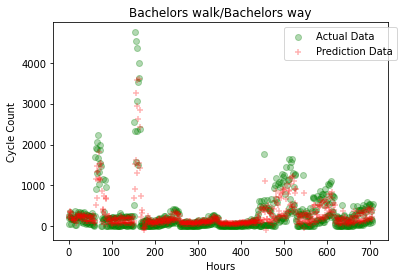

In [46]:
figNo = 2
sub_plt = plt.figure(figNo).add_subplot(111)
sub_plt.title.set_text(all_park_names[0])
x_lim = np.arange(0,len(testY))
actual_data_handler = sub_plt.scatter(x=x_lim, y=test_data[0], marker="o", color="Green", alpha=0.3)
x_lim = np.arange(0,len(testPredict))
pred_data_handler = sub_plt.scatter(x=x_lim, y=pred_data[0], marker="+", color="Red", alpha=0.3)
handlers_array = [actual_data_handler, pred_data_handler]
scatter_labels_array = ["Actual Data", "Prediction Data",]
sub_plt.legend(handlers_array, scatter_labels_array, bbox_to_anchor=(1.04,1))
sub_plt.set_xlabel("Hours")
sub_plt.set_ylabel("Cycle Count")
plt.show()

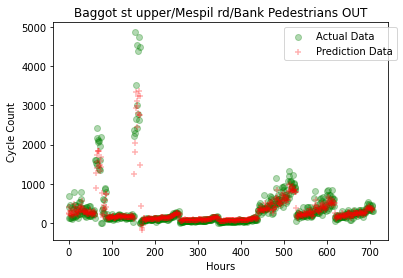

In [60]:
figNo = 3
sub_plt = plt.figure(figNo).add_subplot(111)
sub_plt.title.set_text(all_park_names[8])
x_lim = np.arange(0,len(testY))
actual_data_handler = sub_plt.scatter(x=x_lim, y=test_data[8], marker="o", color="Green", alpha=0.3)
x_lim = np.arange(0,len(testPredict))
pred_data_handler = sub_plt.scatter(x=x_lim, y=pred_data[8], marker="+", color="Red", alpha=0.3)
handlers_array = [actual_data_handler, pred_data_handler]
scatter_labels_array = ["Actual Data", "Prediction Data",]
sub_plt.legend(handlers_array, scatter_labels_array, bbox_to_anchor=(1.04,1))
sub_plt.set_xlabel("Hours")
sub_plt.set_ylabel("Cycle Count")
plt.show()

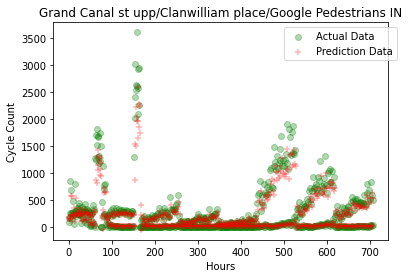

In [61]:
figNo = 4
sub_plt = plt.figure(figNo).add_subplot(111)
sub_plt.title.set_text(all_park_names[37])
x_lim = np.arange(0,len(testY))
actual_data_handler = sub_plt.scatter(x=x_lim, y=test_data[37], marker="o", color="Green", alpha=0.3)
x_lim = np.arange(0,len(testPredict))
pred_data_handler = sub_plt.scatter(x=x_lim, y=pred_data[37], marker="+", color="Red", alpha=0.3)
handlers_array = [actual_data_handler, pred_data_handler]
scatter_labels_array = ["Actual Data", "Prediction Data",]
sub_plt.legend(handlers_array, scatter_labels_array, bbox_to_anchor=(1.04,1))
sub_plt.set_xlabel("Hours")
sub_plt.set_ylabel("Cycle Count")
plt.show()

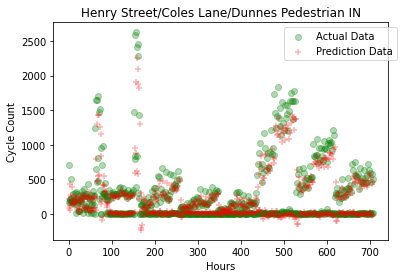

In [59]:
figNo = 5
sub_plt = plt.figure(figNo).add_subplot(111)
sub_plt.title.set_text(all_park_names[40])
x_lim = np.arange(0,len(testY))
actual_data_handler = sub_plt.scatter(x=x_lim, y=test_data[40], marker="o", color="Green", alpha=0.3)
x_lim = np.arange(0,len(testPredict))
pred_data_handler = sub_plt.scatter(x=x_lim, y=pred_data[40], marker="+", color="Red", alpha=0.3)
handlers_array = [actual_data_handler, pred_data_handler]
scatter_labels_array = ["Actual Data", "Prediction Data",]
sub_plt.legend(handlers_array, scatter_labels_array, bbox_to_anchor=(1.04,1))
sub_plt.set_xlabel("Hours")
sub_plt.set_ylabel("Cycle Count")
plt.show()

In [ ]:
# #fitting on training data
# history = model.fit(X_train, Y_train, epochs=20, batch_size=32, 
#                     validation_split=0.1,verbose=1,shuffle=False)
# #plotting loss
# fig=plt.figure()
# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.ylabel('Loss Value')
# plt.xlabel('Epochs')
# plt.legend()
# plt.show()

In [ ]:
# import math
# from sklearn.metrics import mean_squared_error
# # make predictions
# trainPredict = model.predict(X_train)
# testPredict = model.predict(X_test)


# #invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform(Y_train)
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform(Y_test)
# # print(np.shape(trainPredict))
# # print(np.shape(trainY))
# # calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(Y_test, testPredict))
# print('Test Score: %.2f RMSE' % (testScore))


In [ ]:
# figureNo = 0
# plt.rc('font', size=18)
# plt.figure(figureNo, figsize=(6,6))
# plt.title('Original Data', pad=20)
# x_lim = np.arange(0,len(testY))
# plt.plot(x_lim, testY)


# plt.show()


In [ ]:
# print(testY)

In [ ]:
# figureNo = 0
# plt.rc('font', size=18)
# plt.figure(figureNo, figsize=(6,6))
# plt.title('Prediction', pad=20)
# x_lim = np.arange(0,len(testPredict))
# plt.plot(x_lim, testPredict)


# plt.show()

In [ ]:
# print(testPredict)

In [ ]:
# col_index = 0
# fig_index = col_index * 10

# sub_plt = plt.figure(fig_index).add_subplot(111)
# x_lim = np.arange(0,len(testY))
# actual_data_handler = sub_plt.scatter(x=x_lim, y=testY, marker="o", color="Green", alpha=0.3)

# x_lim = np.arange(0,len(testPredict))
# pred_data_handler = sub_plt.scatter(x=x_lim, y=testPredict, marker="+", color="Red", alpha=0.3)
# handlers_array = [actual_data_handler, pred_data_handler]
# scatter_labels_array = ["Actual Data", "Prediction Data",]
# sub_plt.legend(handlers_array, scatter_labels_array, bbox_to_anchor=(1.04,1))
# sub_plt.set_xlabel("Time of Day")
# sub_plt.set_ylabel("Cycle Count")

In [ ]:
# print('R2 Score: ', r2_score(testY, testPredict))
# print('R2 Score: ', r2_score(trainY, trainPredict))